In [64]:
import pandas as pd 

df = pd.read_csv('heart_failure_clinical_records_dataset.csv', encoding = 'cp949')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<br>

<br>

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


- 총 299명의 환자 데이터

- Columns 는 13개

- NaN값 있는 columns 없음

- info를 통해 데이터 타입이 대부분 int였지만, 몇개는 float인것은 알 수 있다.

<br>

범주형 데이터 : count 확인

anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)

diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)

high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)

sex: 성별 (0: 여성, 1: 남성)

smoking: 흡연 여부 (0: 비흡연, 1: 흡연)

DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

<br>

수치형 데이터 : 전반적인 통계량 확인

age: 환자의 나이

creatinine_phosphokinase: 크레아틴키나제 검사 결과

ejection_fraction: 박출계수 (%)

platelets: 혈소판 수 (kiloplatelets/mL)

serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)

serum_sodium: 혈중 나트륨 레벨 (mEq/L)

time: 관찰 기간 (일)

<br>

In [66]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


1. 환자의 나이 분포는 40~95세 사이이고, 평균 연령은 60이다.  

2. (0,1) 로된 범주형 데이터의 평균값을 보면 대부분 0.35~0.64 범주안에 있다 = 특별하게 불균형한 데이터는 없는 것으로 보인다.

    (대부분의 데이터가 6:4 정도의 비율) - 용인 가능한 수준 단, 사망자 데이터는 0.32로 1/3이 생존이라 다소 불균형이다.  

3. creatinine_phosphokinase 의 경우 min값은 23, 50%값은 250, 75%값은 582인데, max값은 7861로 이상치일 것으로 보인다. (제외 해야할 수도 있다.)  

<br>

# EDA 

수치형 데이터별 Histogram - 데이터 빈도 with DEATH_EVENT

- 연령대별 사망수 분포

- age 와 DEATH_EVENT (사망 여부 (0: 생존, 1: 사망))

<Axes: xlabel='age', ylabel='Count'>

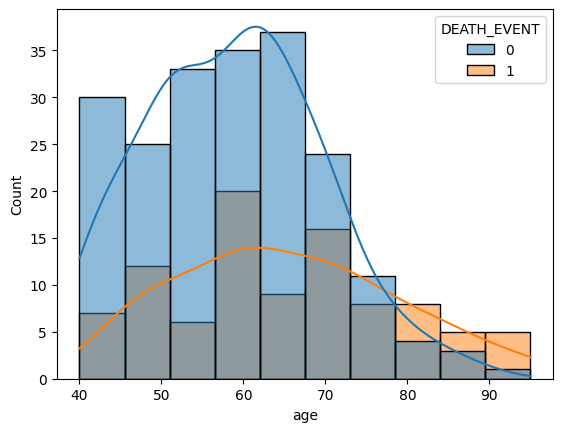

In [69]:
# kde = 히스토그램 분포를 곡선으로 표현
# gray = 1 이지만 0과 겹친 데이터

import seaborn as sns

sns.histplot(x = 'age', data = df, hue = 'DEATH_EVENT', kde = True)

age 데이터는 longtail 형태의 데이터(앞쪽 데이터의 빈도가 높고 뒤로 갈수록 빈도가 낮아지는 형태)

70대 중후반 부터는 생존자보다 사망자의 수가 더 많고, 생존자의 수가 급격히 줄어든다 

→ 나이는 생존율에 영향을 준다.

<br>

creatinine_phosphokinase 는 describe()로 보았을때 outlier가 존재하는 데이터였다.

실제로 값이 3000 이상인 경우 데이터의 count가 낮아서 전체 데이터를 시각화할 경우 데이터를 크게 보기가 어려웠다.

빈도수가 많은 데이터를 살피기 위해 값이 3000이하 인 데이터들만 추려서 시각화 하였다.

<Axes: xlabel='creatinine_phosphokinase', ylabel='Count'>

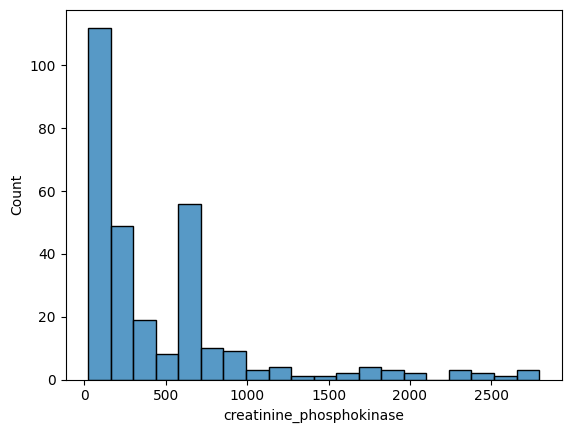

In [70]:
# sns.histplot(data=df['creatinine_phosphokinase'])
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

크레아틴키나제 수치(creatinine_phosphokinase)가 3000이 넘는 경우는 거의 없기 때문에 outlier로 분류한다.

creatinine_phosphokinase 범위를 3000 미만으로 정하고 히스토그램을 그린다.

<br>

### ejection_fraction: 박출계수 (%) - 히스토그램

<Axes: xlabel='ejection_fraction', ylabel='Count'>

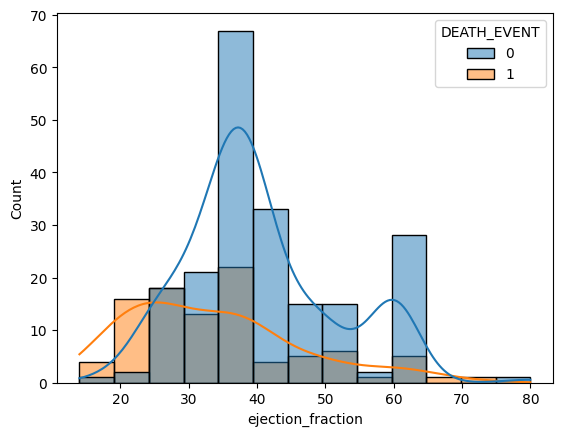

In [71]:
# bins 조절로 빈자리가 없도록 조절
sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT', kde=True)

1) 맥박을 통해 심장에서 박출 되거나 펌프하는 혈액의 %량

2) 범주는 0-100%

3) 의학적으로 박출계수가 50% 또는 더 높다면, 정상 %로 고려(치료 필요 없음)

4) 박출계수가 50%보다 낮다면, 심장은 대부분 충분한 산소가 없다거나, 관상동맥으로 흐르는 혈액이 부족하다는 의미

박출계수(ejection_fraction)가 낮을수록 사망할 확률이 높고, 25% 미만일 경우 생존자보다 사망자가 더 많다. 

→ 박출계수는 생존율에 영향을 준다

<Axes: xlabel='creatinine_phosphokinase', ylabel='Count'>

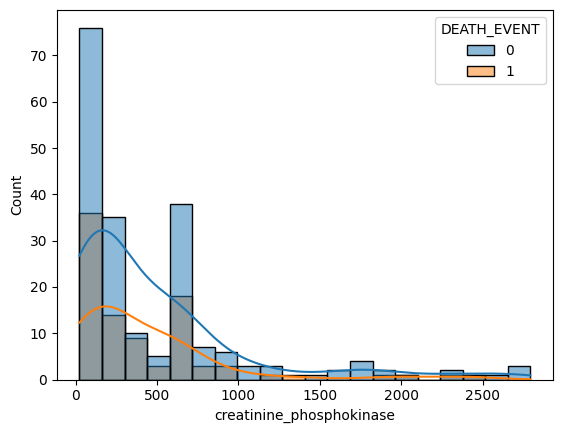

In [72]:
a = df.loc[df['creatinine_phosphokinase'] < 3000]

sns.histplot(x= 'creatinine_phosphokinase', data=a, hue='DEATH_EVENT', kde=True)


혈소판 수(Platelets)는 생존율에 영향을 주는지 확실히 알 수 없다.

<Axes: xlabel='time', ylabel='Count'>

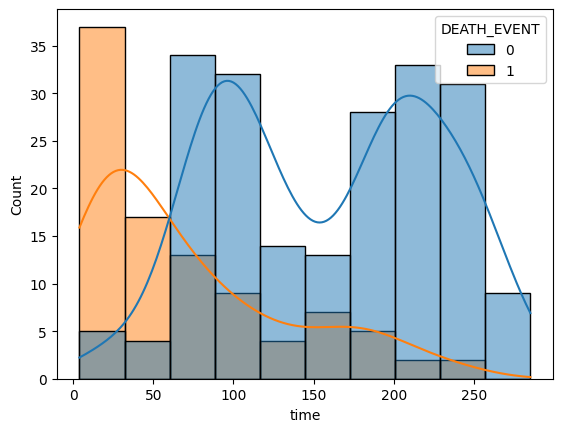

In [73]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

관찰 기간(time)이 짧을수록 생존자보다 사망자 수가 더 많은 것은 사실이지만, 사망했기 때문에 관찰 기간이 짧게 나올 수 있다.

time 데이터에는 이미 DEATH_EVENT 데이터의 결과가 포함된다는 것이다.따라서, time 데이터는 배제하고 학습하는 것이 좋다.

- 관찰기간(time)에 대한 데이터가 초반에 많이 몰려있고, 관찰기간이 긴 데이터일 수록 분포가 떨어진다. (Gamma distribution)

- 생존데이터의 경우 ‘쌍봉 형태’ 이다. 생존자에 대한 대부분의 데이터가 2곳에 집약되어 있는 것.

- 사망자가 발생하면 관찰기간(time)의 값이 더 높아질수가 없는 구조이다.

- 그러므로 time 데이터는 제외하고 학습을 진행하는 것이 바람직 하다

수치형 데이터별 Jointplot

[혈소판 수 (kiloplatelets/mL) x 크레아틴키나제 검사 결과] X 사망자 수

creatinine_phosphokinase: 크레아틴키나제 검사 결과

1) CK (크레아틴키나제)는 심장, 뇌, 골격근, 및 다른 조직에서 발견되는 효소

2) CK(크레아틴키나제) 농도는 근육 또는 심장 세포가 손상될 때에 올라간다.

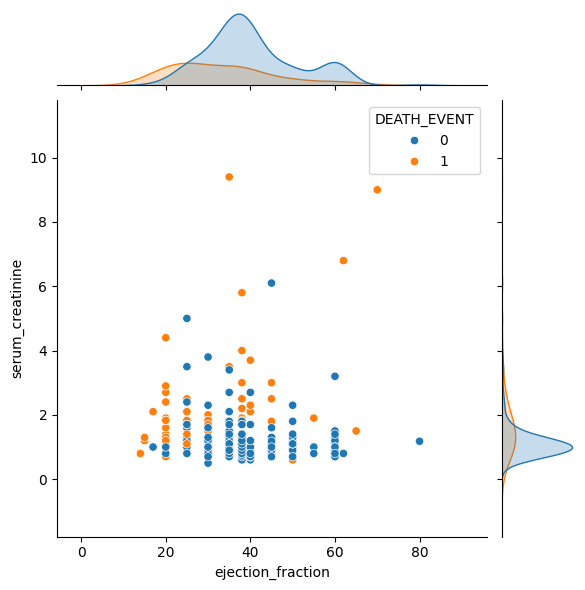

In [74]:
# seaborn의 jointplot()로 산점도와 히스토그램을 함께 그리기
# alpha 옵션으로 투명도 조절, 겹치는 부분을 명확히 볼 수 있음
sns.jointplot(x='ejection_fraction', y='serum_creatinine', hue='DEATH_EVENT', data=df)

박출계수(ejection_fraction)가 높고 혈중 크레아틴 레벨(serum_creatinine)이 낮을수록 생존율이 높다.

<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

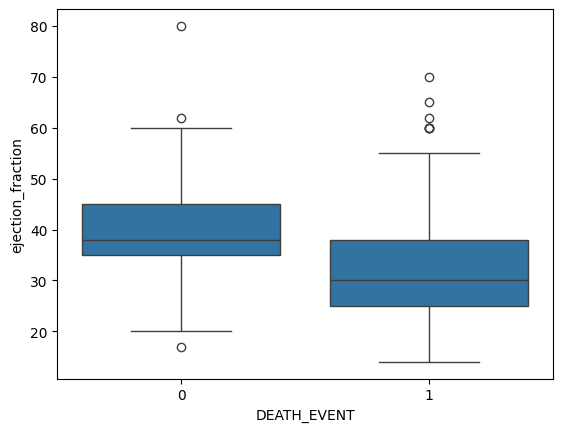

In [75]:
# seaborn의 boxplot()로 박스플롯 그리기
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

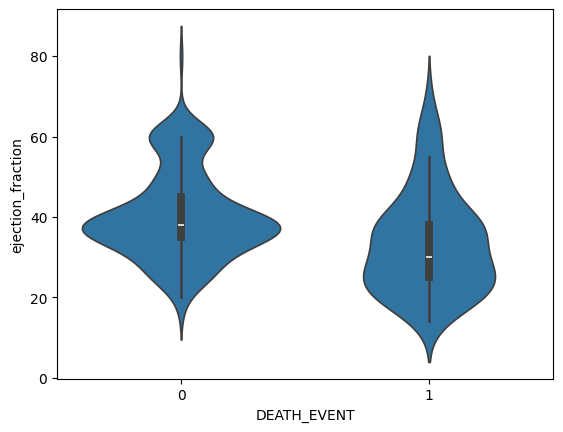

In [76]:
# seaborn의 violinplot()로 바이올린플롯 그리기
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

<Axes: xlabel='DEATH_EVENT', ylabel='platelets'>

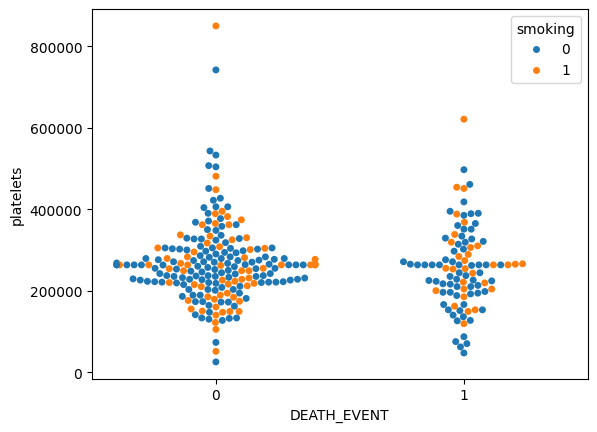

In [77]:
# swarmplot = violinplot + scatterplot
# swarmplot에서는 hue 옵션 사용이 유용함
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)

# 데이터 전처리

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분
X_num =  df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [80]:
# StandardScaler을 이용하여 수치형 데이터 표준화 진행
# 평균 0, 표준편차 1이 되도록 변환
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)

# StandardScaler로 데이터를 전처리하면 numpy 형태로 바뀌기 때문에 다시 DataFrame 형태로 바꾸는 것이 좋음
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)

# concat을 이용하여 수치형 데이터와 범주형 데이터를 병합
# axis=1 옵션으로 column끼리 합침
X = pd.concat([X_scaled, X_cat], axis=1)
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


# 학습 데이터와 테스트 데이터 분리

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# train_test_split을 이용하여 학습 데이터와 테스트 데이터 분리
# test_size=0.3 → 70% train, 30% test 데이터로 사용
# shuffle=False : 시간적 관계가 있어서 앞의 데이터로 학습하고 뒤의 데이터로 테스트해야 할 때 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
14,-0.996547,-0.518074,-0.684180,1.675963,-0.381379,0.312044,1,0,1,0,0
210,0.771889,-0.381804,-1.784473,1.286781,-0.381379,-0.141976,0,1,1,1,1
236,1.192945,-0.477812,1.008578,-0.157292,-0.284552,2.582144,0,0,1,1,0
44,-0.070223,0.006360,1.854958,-0.710340,-0.284552,1.220084,1,1,0,0,0
163,-0.912335,1.808842,-0.260991,-1.929096,-0.478205,1.220084,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
203,-0.070223,-0.539753,-1.107370,-0.525991,2.039276,-0.141976,0,0,1,1,1
255,-0.743913,-0.403483,-0.684180,0.723490,-0.381379,1.220084,1,1,1,1,1
72,2.035057,5.471619,-0.260991,-0.208500,-0.381379,-1.050016,0,0,0,1,1
235,1.361368,-0.488136,1.008578,1.460889,-0.284552,0.085034,1,0,1,1,0


# Classification 모델 학습

1. Logistic Regression 모델

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
# LogisticRegression 모델 생성/학습
# verbose=1 옵션으로 학습 과정 표현
# iteration이 부족하여 학습이 되지 않을 때는 max_iter 값 높이기
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [85]:
from sklearn.metrics import classification_report

In [86]:
# classification_report을 이용하여 모델 학습 결과 평가
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



2. XGBoost 모델

In [87]:
from xgboost import XGBClassifier

In [88]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier(eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [89]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        64
           1       0.59      0.50      0.54        26

    accuracy                           0.76        90
   macro avg       0.70      0.68      0.69        90
weighted avg       0.75      0.76      0.75        90



정확도(accuracy) = 0.77 (77%)

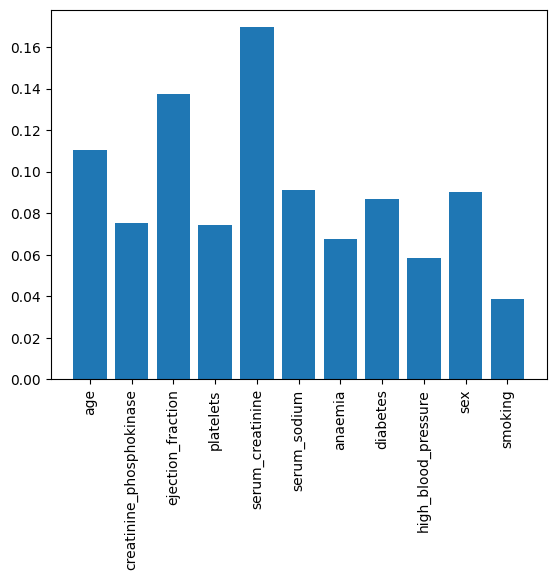

In [90]:
# XGBClassifier 모델의 feature_importances_를 이용하여 피쳐 중요도 확인
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 모델 학습 결과 심화 분석

1. Precision-Recall 커브

In [91]:
from sklearn.metrics import PrecisionRecallDisplay

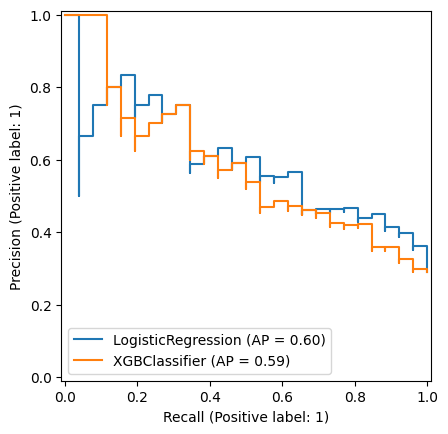

In [94]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

# 그래프를 그릴 준비 (figure와 axes 만들기)
fig, ax = plt.subplots()

# PrecisionRecallDisplay를 사용해서 그래프 그리기
PrecisionRecallDisplay.from_estimator(model_lr, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(model_xgb, X_test, y_test, ax=ax)

# 그래프 보여주기
plt.show()


2. ROC 커브

In [99]:
from sklearn.metrics import RocCurveDisplay

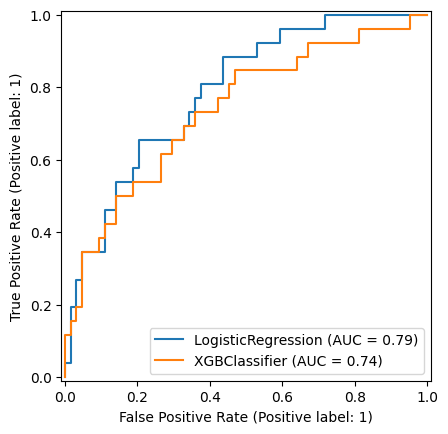

In [100]:
fig, ax = plt.subplots()

# ROC 커브 그리기
RocCurveDisplay.from_estimator(model_lr, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(model_xgb, X_test, y_test, ax=ax)

# 그래프 보여주기
plt.show()

AUC = ROC 커브 아래 영역AUC가 클수록 좋으므로 LogisticRegression 모델의 성능이 XGBoost 모델보다 조금 더 좋다.